### Overview

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

Let’s understand this with an example. Suppose, you are the head of a rental store and wish to understand preferences of your costumers to scale up your business. Is it possible for you to look at details of each costumer and devise a unique business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your costumers into say 10 groups based on their purchasing habits and use a separate strategy for costumers in each of these 10 groups. And this is what we call clustering.

### K Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

***The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.***

Let’s now take an example to understand how K-Means actually works:

![kmeans1](images/kmeans1.webp)

We have these 8 points and we want to apply k-means to create clusters for these points. Here’s how we can do it.

 

#### Step 1: Choose the number of clusters k
The first step in k-means is to pick the number of clusters, k.

#### Step 2: Select k random points from the data as centroids
Next, we randomly select the centroid for each cluster. Let’s say we want to have 2 clusters, so k is equal to 2 here. We then randomly select the centroid:

![kmeans2](images/kmeans2.webp)

Here, the red and green circles represent the centroid for these clusters.

#### Step 3: Assign objects to their closest cluster center according to the Euclidean distance function.

$$Euclidean\ distance =  \sqrt{(x_1-y_1)^2+(x_2-y_2)^2+....+(x_n-y_n)^2}$$

Once we have initialized the centroids, we assign each point to the closest cluster centroid:

![kmeans3](images/kmeans3.webp)

Here you can see that the points which are closer to the red point are assigned to the red cluster whereas the points which are closer to the green point are assigned to the green cluster.

#### Step 4: Recompute the centroids of newly formed clusters
Now, we calculate the mean values of the clusters created and the  new centriod values will these mean values and centroid is moved along the graph.


![kmeans4](images/kmeans4.webp)
Here, the red and green crosses are the new centroids.

### Step 5: Repeat steps 3 and 4
We then repeat steps 3 and 4:

![kmeans5](images/kmeans5.webp)

The step of computing the centroid and assigning all the points to the cluster based on their distance from the centroid is a single iteration. But wait – when should we stop this process? It can’t run till eternity, right?

### Stopping Criteria for K-Means Clustering
There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:

1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations are reached

### Implementation in sklearn

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Import the dataset

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [4]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


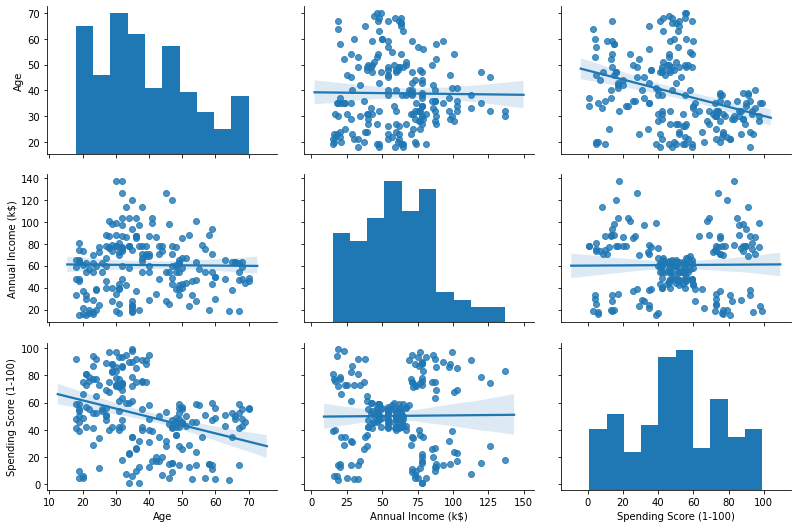

In [5]:
# conventional way to import seaborn
import seaborn as sns

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset[['Age','Annual Income (k$)','Spending Score (1-100)']], kind='reg',aspect = 1.5)#height=7, aspect=0.7,

In [6]:
dataset.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


This shows that the spending score is much more dependent on the age group and less on the income. A person in his/her 20s and 30s has lesser responsibilities and dependencies and hence is able to spend more! So our marketing strategies should not try to categorise clients based on their income but rather their age group! Lets dig deeper and verify our results using ML

Lets use KMeans and see if we can cluster customers into groups depending on their spending score & age.

In [12]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
train_data = dataset.iloc[:, [2, 4]].values

In [14]:
from sklearn.cluster import KMeans

### What should be the value of K (Number of Clusters)

### Elbow Method

There is a popular method known as **elbow method** which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible. The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

In [15]:
error_rate = []

for i in range(1,21):
    KM = KMeans(n_clusters=i)
    KM.fit(train_data)
    
    error_rate.append(KM.inertia_)

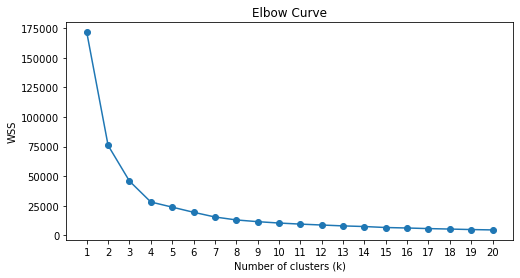

In [17]:
# Plotting Elbow (Error) curve
plt.figure(figsize=(8,4))
plt.plot(range(1,21),error_rate,marker='o')
plt.xticks(range(1,21))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WSS')
plt.show()


### The Silhouette Method
The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster.

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
sil_score = []

for i in range(2,21):
    KM = KMeans(n_clusters=i)
    KM.fit(train_data)
    
    labels = KM.labels_
    sil_score.append(silhouette_score(train_data, labels, metric = 'euclidean'))

**As mentioned before that a high Silhouette Score is desirable. The Silhouette Score reaches its global maximum at the optimal k. This should ideally appear as a peak in the Silhouette Value-versus-k plot.**

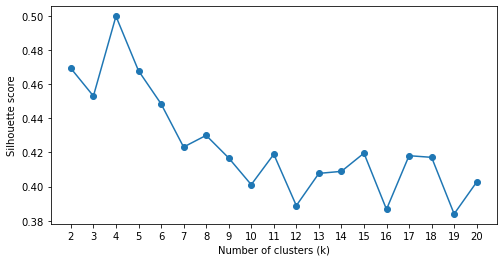

In [21]:
# Plotting Silhouette Score Vs k
plt.figure(figsize=(8,4))
plt.plot(range(2,21),sil_score,marker='o')
plt.xticks(range(2,21))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

In [27]:
# Creating the final cluster solution with optimal number of clusters

km = KMeans(n_clusters = 4, random_state = 0)

In [29]:
km.fit(train_data)

KMeans(n_clusters=4, random_state=0)

In [31]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [33]:
y_means = km.fit_predict(train_data)

In [34]:
y_means

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Text(0, 0.5, 'Spending Score')

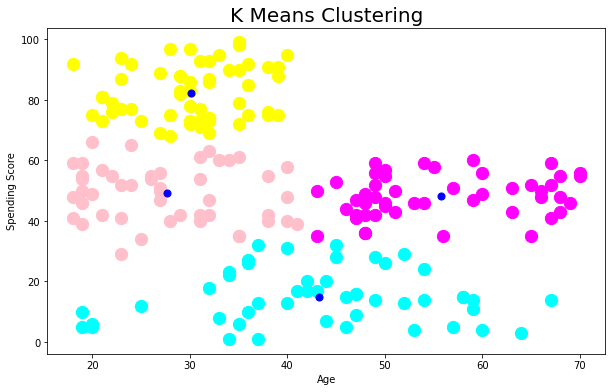

In [35]:
plt.figure(figsize = (10,6))
plt.scatter(train_data[y_means == 0, 0], train_data[y_means == 0, 1], s = 150, c = 'pink')
plt.scatter(train_data[y_means == 1, 0], train_data[y_means == 1, 1], s = 150, c = 'yellow')
plt.scatter(train_data[y_means == 2, 0], train_data[y_means == 2, 1], s = 150, c = 'cyan')
plt.scatter(train_data[y_means == 3, 0], train_data[y_means == 3, 1], s = 150, c = 'magenta')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')

Hence we are able to categorise different age groups wrt their age and spending score.

### Resources:

How to Determine the Optimal K for K-Means? - https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

In [58]:
dataset['cluster'] = y_means

In [59]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2


In [62]:
dataset.mean()

CustomerID                100.500
Age                        38.850
Annual Income (k$)         60.560
Spending Score (1-100)     50.200
cluster                     1.485
dtype: float64

In [61]:
dataset.groupby('cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

C:\Users\sunny.verma\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,27.617021,53.276596,49.148936
1,30.175439,66.070175,82.350877
2,43.291667,66.937500,15.020833
3,55.708333,54.770833,48.229167
